In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df10 = pd.read_excel(data_path, sheet_name=10)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df10.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.083555,0.079621,0.083467,0.078862,0.075102,0.073984,0.071158,0.070371,...,0.030554,0.030362,0.030148,0.030035,0.030034,0.029922,0.029810,0.029738,0.029607,0.029532
1,Control,1,0.075327,0.073848,0.078093,0.074296,0.069430,0.065301,0.059608,0.060230,...,0.029432,0.029188,0.028973,0.028771,0.028643,0.028495,0.028315,0.028228,0.028225,0.028161
2,Control,1,0.090605,0.084478,0.091553,0.086181,0.082013,0.080516,0.073748,0.071062,...,0.031466,0.031252,0.031011,0.030852,0.030806,0.030714,0.030645,0.030567,0.030474,0.030385
3,Control,1,0.077915,0.074246,0.079706,0.077052,0.071366,0.066747,0.065076,0.062712,...,0.028835,0.028716,0.028512,0.028398,0.028290,0.028146,0.028065,0.027911,0.027653,0.027496
4,Control,1,0.079603,0.075830,0.079945,0.074140,0.072004,0.073187,0.067204,0.063971,...,0.031128,0.030971,0.030772,0.030635,0.030560,0.030449,0.030333,0.030241,0.030149,0.030100


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    210
1     15
Name: count, dtype: int64

Balanced class distribution:
Sana
1    210
0    210
Name: count, dtype: int64

Original shape: (225, 2151), Balanced shape: (420, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_13416\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.083555,0.079621,0.083467,0.078862,0.075102,0.073984,0.071158,0.070371,0.071017,...,0.030554,0.030362,0.030148,0.030035,0.030034,0.029922,0.029810,0.029738,0.029607,0.029532
1,1,0.075327,0.073848,0.078093,0.074296,0.069430,0.065301,0.059608,0.060230,0.062227,...,0.029432,0.029188,0.028973,0.028771,0.028643,0.028495,0.028315,0.028228,0.028225,0.028161
2,1,0.090605,0.084478,0.091553,0.086181,0.082013,0.080516,0.073748,0.071062,0.073898,...,0.031466,0.031252,0.031011,0.030852,0.030806,0.030714,0.030645,0.030567,0.030474,0.030385
3,1,0.077915,0.074246,0.079706,0.077052,0.071366,0.066747,0.065076,0.062712,0.063985,...,0.028835,0.028716,0.028512,0.028398,0.028290,0.028146,0.028065,0.027911,0.027653,0.027496
4,1,0.079603,0.075830,0.079945,0.074140,0.072004,0.073187,0.067204,0.063971,0.065071,...,0.031128,0.030971,0.030772,0.030635,0.030560,0.030449,0.030333,0.030241,0.030149,0.030100


In [5]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana'])

X = df_X.values  

y = df_balanced['Sana'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Logistic Regression

In [6]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8650793650793651
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        63
           1       0.84      0.90      0.87        63

    accuracy                           0.87       126
   macro avg       0.87      0.87      0.86       126
weighted avg       0.87      0.87      0.86       126



In [7]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


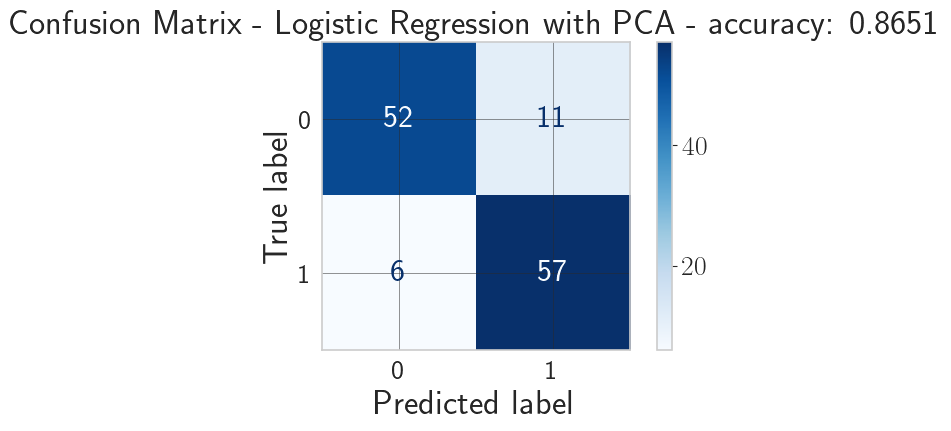

In [8]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()